In [1]:
import pandas as pd
import numpy as np
from termcolor import colored as cl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import jaccard_similarity_score as jss 
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
%matplotlib inline

#read data
df = pd.read_csv(filepath_or_buffer='/content/cvd_data.csv') 

In [2]:
#Show the first 3 rows of the data
df.head(3)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4


In [3]:
#Check whether each column contains null value and/or non-values
df.isnull().sum()

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

In [4]:
#get more column information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


#Part I: 
##Build a binary classifier model to predict the CVD Risk (Yes/No, or 1/0) using a Logistic Regression Model with the best performance possible

In [5]:
#CVD Risk: col'cvd_4types'
    #0 indicates “No Risk”, 1 indicates “Risk Present”

#A general look for the counts of 0 and 1 
df['cvd_4types'].value_counts()

1    1913
0    1329
Name: cvd_4types, dtype: int64

In [6]:
#define independent variable as x variable
#define dependent variable as y variable
X_var = np.asarray(df.drop(['cvd_4types'], axis=1))
y_var = np.asarray(df['cvd_4types'])

#display how the variables look like within the first 5 indexes
print(cl('X_var samples : ', attrs = ['bold']), X_var[:5])
print(cl('y_var samples : ', attrs = ['bold']), y_var[:5])

X_var samples :  [[ 54.    1.    2.    1.  110.   40.  108.   87.5  34.    0.    1.    0.
    1.    2.    3.    4. ]
 [ 56.    3.    2.    1.  113.   34.  107.   83.5   0.    0.    0.    0.
    2.    2.    1.    3. ]
 [ 54.    1.    3.    1.  110.   44.5 105.   86.2  49.5   0.    0.    0.
    3.    2.    6.    4. ]
 [ 54.    1.    3.    1.  129.   42.5 110.   89.1   0.    0.    0.    0.
    3.    2.    1.    3. ]
 [ 51.    3.    2.    1.  122.   37.  113.   81.3   0.    0.    0.    0.
    2.    1.    1.    2. ]]
y_var samples :  [0 0 0 0 0]


In [7]:
#normalize indendent variable: X_var

X_var = StandardScaler().fit(X_var).transform(X_var)

print(cl(X_var[:5], attrs=['bold']))

[[-1.04134264 -0.26437623 -0.46765456 -0.39476179  0.44705227  0.59733167
   0.793625    0.58025187  1.04675898 -0.34687552  1.43173283 -0.26915533
  -2.19295058 -0.29563183 -1.266204    0.2199811 ]
 [-0.84901445  5.31938748 -0.46765456 -0.39476179  0.73891467 -0.86595064
   0.72007375  0.0705964  -0.64028226 -0.34687552 -0.69845433 -0.26915533
  -0.70497532 -0.29563183 -3.22517959 -1.40828086]
 [-1.04134264 -0.26437623  0.96536632 -0.39476179  0.44705227  1.6947934
   0.57297125  0.41461384  1.81585131 -0.34687552 -0.69845433 -0.26915533
   0.78299994 -0.29563183  1.67225939  0.2199811 ]
 [-1.04134264 -0.26437623  0.96536632 -0.39476179  2.29551415  1.20703263
   0.94072749  0.78411406 -0.64028226 -0.34687552 -0.69845433 -0.26915533
   0.78299994 -0.29563183 -3.22517959 -1.40828086]
 [-1.32983492  5.31938748 -0.46765456 -0.39476179  1.61450188 -0.13430949
   1.16138123 -0.20971411 -0.64028226 -0.34687552 -0.69845433 -0.26915533
  -0.70497532 -1.34655112 -3.22517959 -3.03654282]]


In [8]:
#split data to training and testing
X_train, X_test, y_train, y_test = train_test_split(X_var,
                                                    y_var,
                                                    test_size = 0.3, 
                                                    random_state = 4)
#take a look for the splited data for X and y 
print(cl('X_train samples : ', attrs = ['bold']), X_train[:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[:10])
print(cl('y_test samples : ', attrs = ['bold']), y_test[:10])

X_train samples :  [[-1.7144913  -0.26437623 -0.46765456 -0.39476179  0.37116804 -0.50013006
  -0.2375635   3.98220214 -0.5906634   2.06809317 -0.69845433 -0.26915533
  -2.19295058  0.75528746 -0.2867162  -1.40828086]
 [ 0.40111877 -0.26437623  0.96536632 -0.39476179  0.44705227  1.32897282
   0.27876626  0.17252749 -0.64028226 -0.34687552 -0.69845433 -0.26915533
   0.78299994  0.75528746 -0.2867162   0.2199811 ]
 [-1.6183272  -0.26437623  0.96536632 -0.39476179 -0.52582241 -0.50013006
  -1.33936119 -1.22902505 -0.64028226 -0.34687552 -0.69845433 -0.26915533
   0.78299994 -0.29563183  0.6927716   0.2199811 ]
 [ 0.40111877 -0.26437623 -0.46765456 -0.39476179  0.54433974  1.08509244
   0.57297125  1.2300626   1.8902796  -0.34687552 -0.69845433 -0.26915533
  -2.19295058 -0.29563183 -2.24569179 -1.40828086]
 [-0.75285036 -0.26437623 -0.46765456  1.74719254  1.12806454 -0.57329418
   0.42586876  0.23623443 -0.64028226  1.26310361 -0.69845433 -0.26915533
  -2.19295058 -1.34655112 -0.2867162 

In [9]:
#logistic regression model using scikit-learn
lr = LogisticRegression(C=0.1, solver='liblinear') 
    #the samller the c, the stronger the regularization
lr.fit(X_train,y_train)

print(cl(lr, attrs=['bold']))

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [10]:
#predication on our testing set 
yhat = lr.predict(X_test)
yhat_prob = lr.predict_proba(X_test)

#take a look for the probability of class 1(y=1) and class 0(y=0)
print(cl('yhat samples : ', attrs = ['bold']), yhat[:10])
print(cl('yhat_prob samples : ', attrs = ['bold']), yhat_prob[:10])

yhat samples :  [1 1 1 1 1 1 0 1 0 0]
yhat_prob samples :  [[0.45566563 0.54433437]
 [0.38711372 0.61288628]
 [0.41519432 0.58480568]
 [0.27091675 0.72908325]
 [0.22165387 0.77834613]
 [0.2787146  0.7212854 ]
 [0.64895754 0.35104246]
 [0.36875825 0.63124175]
 [0.84952444 0.15047556]
 [0.58338638 0.41661362]]


#Part II:
##Display the Feature Importance of all the features sorted in the order of decreasing influence on the CVD Risk

In [11]:
#ways to rank features: 
#coefficient values, RFE(recursive feature eliminiation), SFM(SelectFromModels)

#I decide to use SFM method here to display the feature importance

features = df.drop(['cvd_4types'], axis=1)
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(lr, threshold =-np.inf)
smf.fit(X_train,y_train)
feature_idx = smf.get_support()
feature_name = features.columns[feature_idx]
feature_name

print(cl('Most influenced to least influenced features : ', 
         attrs = ['bold']), feature_name.values)

Most influenced to least influenced features :  ['age_s1' 'race' 'educat' 'mstat' 'hip' 'neck20' 'waist' 'av_weight_kg'
 'cgpkyr' 'tea15' 'srhype' 'parrptdiab' 'bend25' 'happy25' 'tired25'
 'hlthlm25']


#Part III:
##Evaluate the performance of your model (including ROC Curve), explain the performance and draw a meaningful conclusion

In [12]:
#1. precision score 

print(cl('Precision Score of our model is {}'.format(precision_score(y_test, yhat).round(2)), 
         attrs = ['bold']))


Precision Score of our model is 0.68



**Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.**

**When it predicts the positive result, 68% of the results are accurate.**

In [13]:
#2. classification report 

print(cl(classification_report(y_test, yhat), attrs = ['bold']))

              precision    recall  f1-score   support

           0       0.65      0.46      0.54       406
           1       0.68      0.83      0.75       567

    accuracy                           0.67       973
   macro avg       0.67      0.64      0.64       973
weighted avg       0.67      0.67      0.66       973



**1. Recall is the number of true positives divided by the number of true positives plus the number of false negatives.**

**83% of real positivie cases are correctly identified (I am using 83% from class 1 here align with the sklearn default setting).**

**Recall is also known as “sensitivity” and “true positive rate” (TPR).**


**2. F1 Score is the weighted average of Precision and Recall. It is useful when you need to take both precision and recall into account.**

**A perfect model has an F-score of 1.**



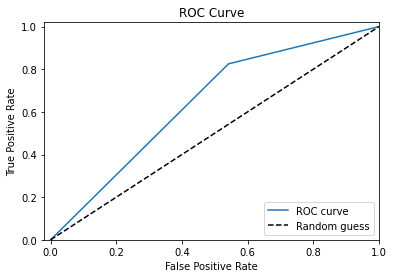

In [14]:
#3. ROC curve 
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


#set up the function for plot the roc curve
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.xlim([-0.02, 1])
    plt.ylim([0, 1.02])
    plt.legend(loc="lower right")
    plt.show()

fpr,tpr,thresholds = roc_curve(y_test, yhat)
plot_roc_curve(fpr,tpr)

**ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (here for our CVD Risk is Yes or No).** 

**The point of perfect classification is the top-left corner of the plot where the TP rate is 1 and the FP rate is 0 — that is, no 1 are classified as 0 and no 0 are classified as 1.**

In [15]:
#4. log loss (logarithmic loss)

print(cl('Log Loss of our model is {}'.format(log_loss(y_test, yhat).round(2)), 
         attrs = ['bold']))


Log Loss of our model is 11.32


**Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification).**

**The bolder the probabilities, the better will be your Log Loss (closer to zero). It is a measure of uncertainty (you may call it entropy), so a low Log Loss means a low uncertainty/entropy of your model.**

**In the worst case, let’s say you predicted 0.5 for all the observations. So log-loss will become -log(0.5) = 0.69. Hence, we can say that anything above 0.6 is a very poor model considering the actual probabilities.**

**Since the log loss result here is absurd, there might be an error occured. Thus I decide to put this result aside temporarily.**